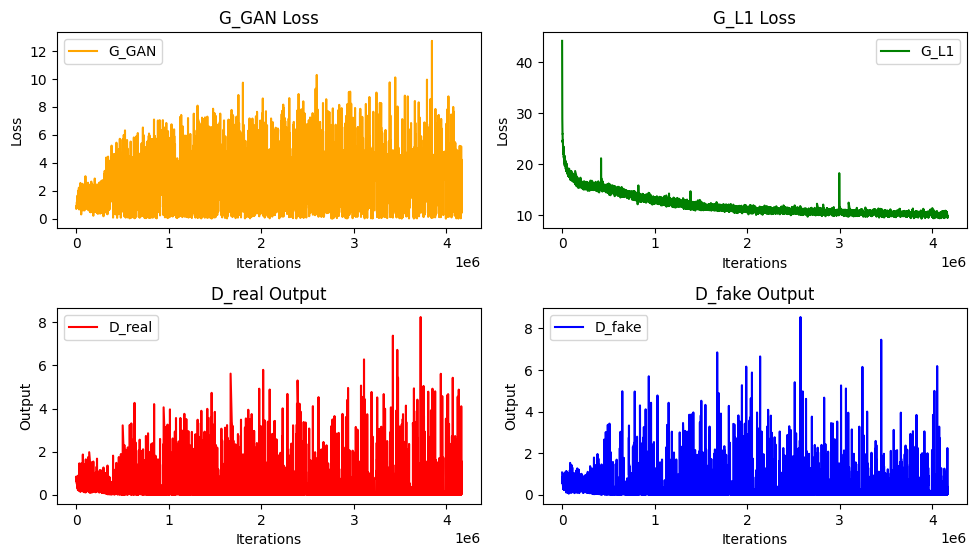

In [5]:
import re
import matplotlib.pyplot as plt

# Initialize lists to store data
epochs = []
iters = []
G_GAN = []
G_L1 = []
D_real = []
D_fake = []

# Define regular expression pattern
pattern = r"epoch: (\d+), iters: (\d+),.*G_GAN: ([\d.]+) G_L1: ([\d.]+) D_real: ([\d.]+) D_fake: ([\d.]+)"

# Read and parse the log file
with open('loss_log-ny-manhattan-p2p-200-150-v100_200-epochs.txt', 'r') as file:
    for line in file:
        match = re.search(pattern, line)
        if match:
            epochs.append(int(match.group(1)))
            iters.append(int(match.group(2))+int(match.group(1))*20100-20100)
            G_GAN.append(float(match.group(3)))
            G_L1.append(float(match.group(4)))
            D_real.append(float(match.group(5)))
            D_fake.append(float(match.group(6)))

# Create subplots for each metric
plt.figure(figsize=(10, 8))

plt.subplot(3, 2, 1)
plt.plot(iters, G_GAN, label='G_GAN', color='orange')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('G_GAN Loss')
plt.legend()

plt.subplot(3, 2, 2)
plt.plot(iters, G_L1, label='G_L1', color='green')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('G_L1 Loss')
plt.legend()

plt.subplot(3, 2, 3)
plt.plot(iters, D_real, label='D_real', color='red')
plt.xlabel('Iterations')
plt.ylabel('Output')
plt.title('D_real Output')
plt.legend()

plt.subplot(3, 2, 4)
plt.plot(iters, D_fake, label='D_fake', color='blue')
plt.xlabel('Iterations')
plt.ylabel('Output')
plt.title('D_fake Output')
plt.legend()

plt.tight_layout()
plt.show()